Here we are going to look at the translocation speed of molecules (bp/s) as a function of time (min) in sequencing runs:

In [46]:
import pandas as pd
import statsmodels
from math import floor, ceil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5, rc={'pdf.fonttype': 42,'ps.fonttype' : 42 , 'font.sans-serif': ['Arial']})

# Nano2om:

In [2]:
path = "/kyber/Data/Nanopore/projects/nano2om/190617_nano2om/fastq/"

In [3]:
! ls /kyber/Data/Nanopore/projects/nano2om/190617_nano2om/fastq/

1623_ivt  1623_native  1825_ivt  1825_native


In [47]:
def get_df(file):
    df = pd.read_csv(file, sep='\t')
    df["time"] = df["template_start"] - df["template_start"].min()  # normalize time
    df["translocation_speed"] = df["sequence_length_template"]/df["template_duration"] # bp/s
    df["time"] = df["time"]/60 #get time in minutes
    df.sort_values("time")
    df.sort_values("time",inplace=True)
    df["time"] = df["time"].apply(lambda x: floor(x))
    df = df.reindex()
    return df

In [57]:
def plot_trans_speed(df, title, save_path):
    plt.figure(figsize=(30, 6))
    sns.lineplot(x="time",y="translocation_speed",data=df,ci="sd",estimator="median")
    sns.despine()
    # plt.title("Control_Structure")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(save_path + title + '.pdf', format='pdf', dpi=1200,bbox_inches='tight')

In [58]:
ivt_1623 = get_df(path + '1623_ivt/sequencing_summary.txt')
native_1623 = get_df(path + '1623_native/sequencing_summary.txt')
ivt_1825 = get_df(path + '1825_ivt/sequencing_summary.txt')
native_1825 = get_df(path + '1825_native/sequencing_summary.txt')

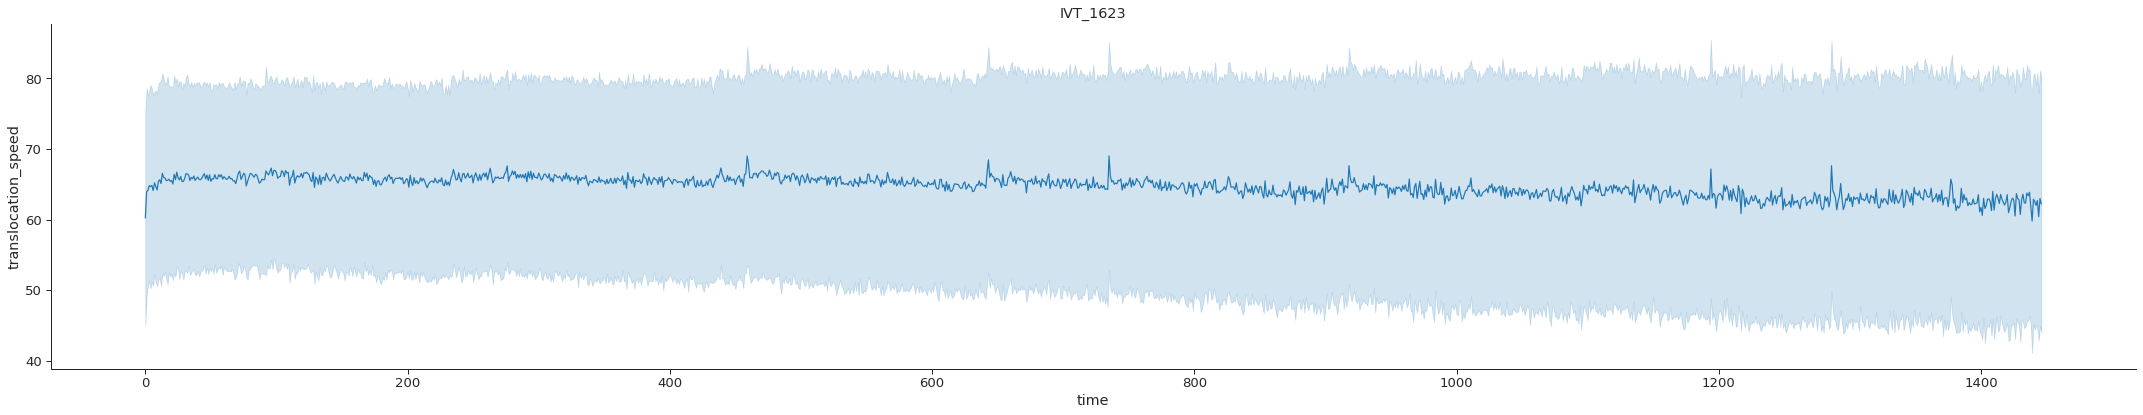

In [59]:
plot_trans_speed(ivt_1623,"IVT_1623","plots/translocation_speed/")

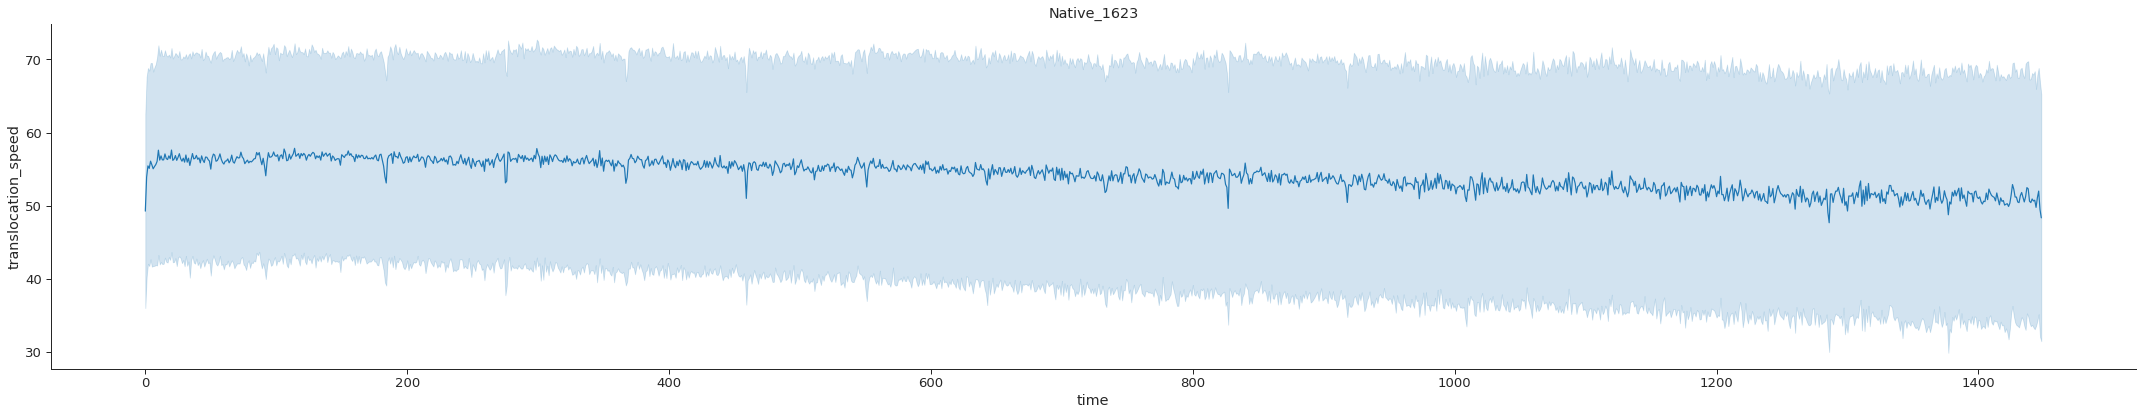

In [60]:
plot_trans_speed(native_1623,"Native_1623","plots/translocation_speed/")

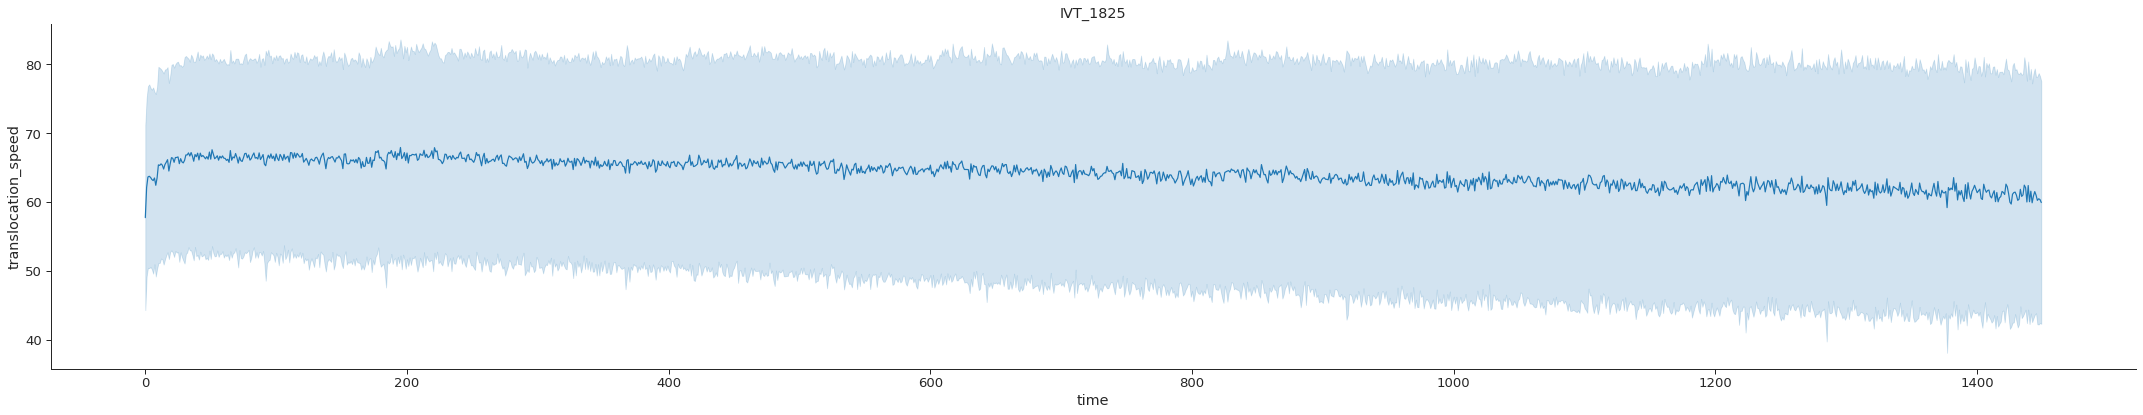

In [61]:
plot_trans_speed(ivt_1825,"IVT_1825","plots/translocation_speed/")

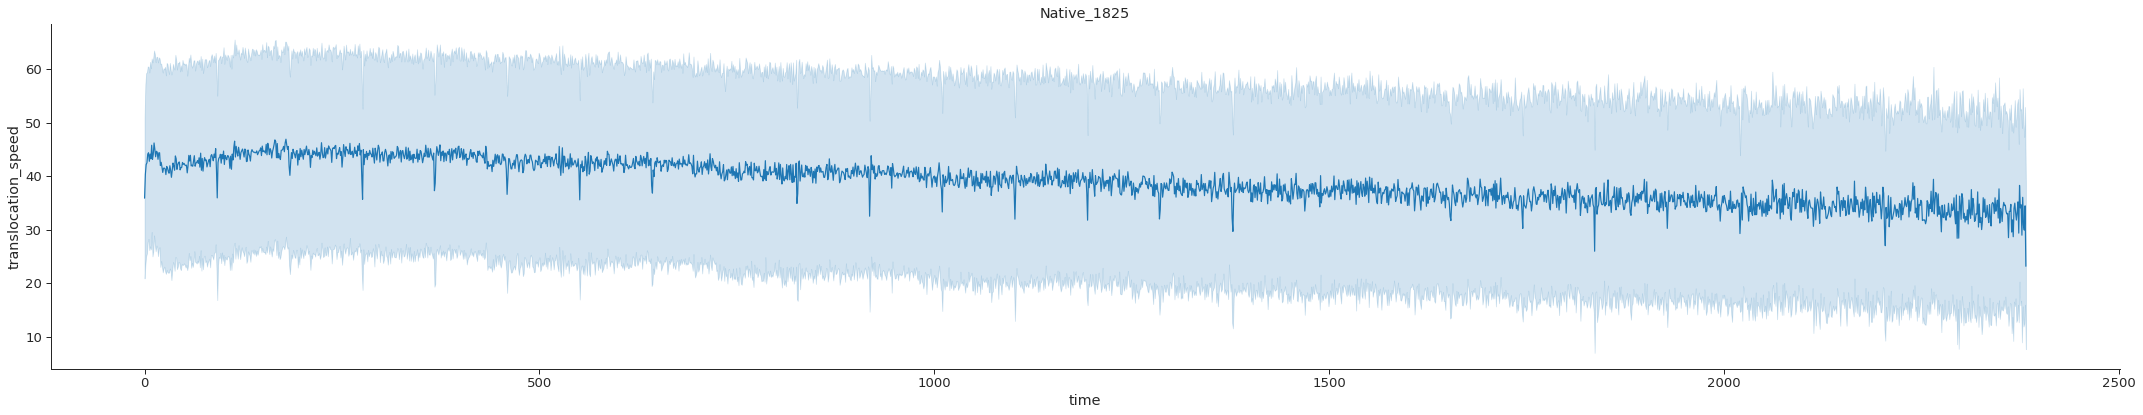

In [62]:
plot_trans_speed(native_1825,"Native_1825","plots/translocation_speed/")

# Structure:

In [63]:
control_DMSO = get_df("/uru/Data/Nanopore/projects/nanoprobe/mir1792/1/GUPPY/sequencing_summary.txt")
oneAI_200mM = get_df("/uru/Data/Nanopore/projects/nanoprobe/mir1792/5/GUPPY/sequencing_summary.txt")

## Control(DMSO):

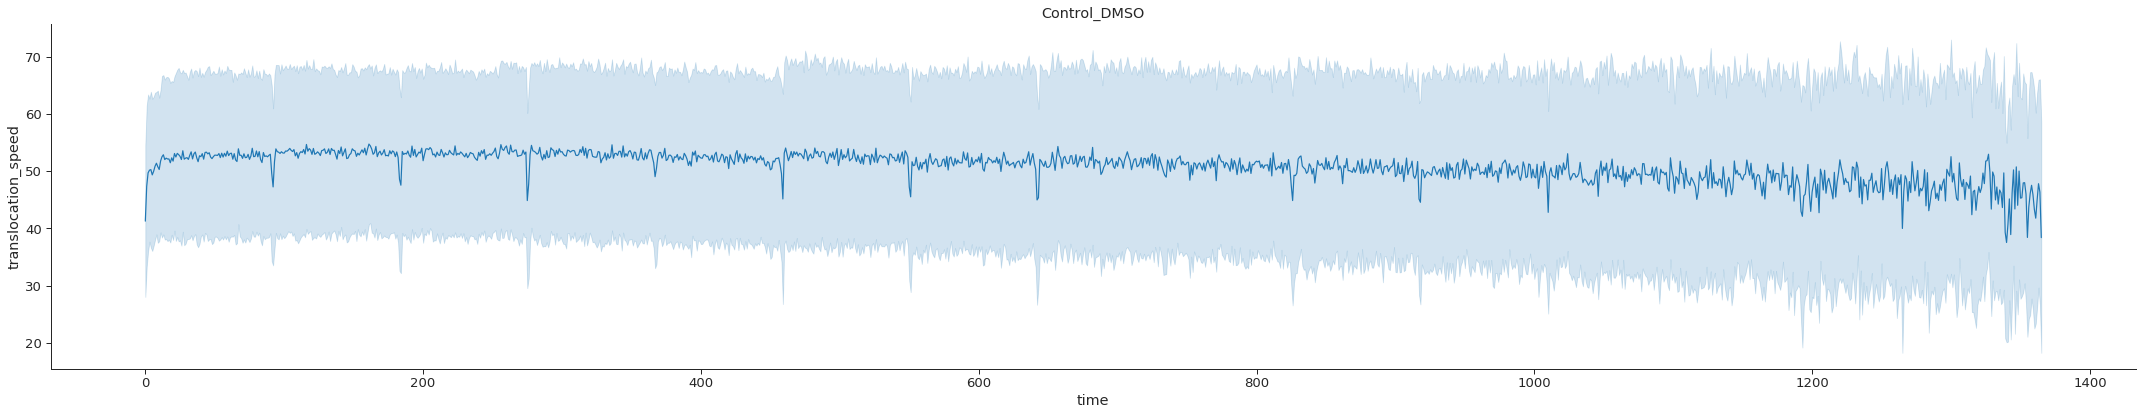

In [64]:
plot_trans_speed(control_DMSO,"Control_DMSO","plots/translocation_speed/")

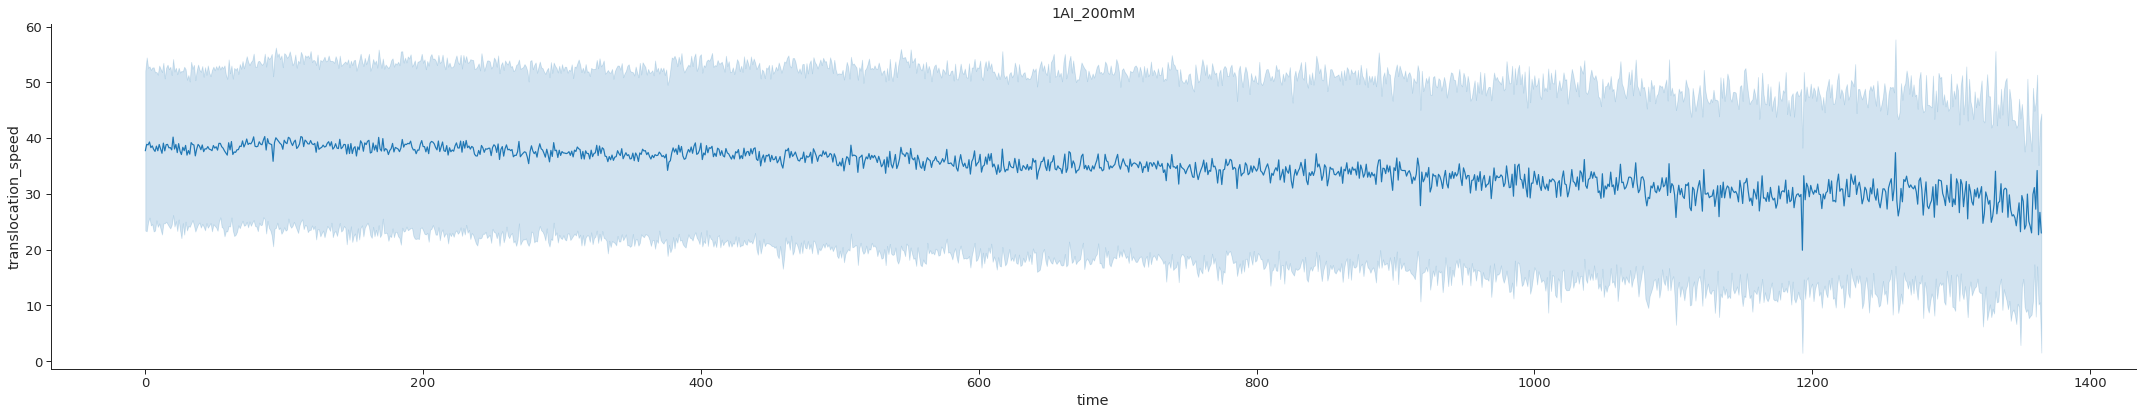

In [65]:
plot_trans_speed(oneAI_200mM,"1AI_200mM","plots/translocation_speed/")